In [34]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import natural_cubic_spline_stack_overflow as ncs

# 1st scenario: UK government plan

This scenario is a inflow-driven scenario. UK government plan to build 300 000 new buildings by 2030 and probably the same amount each year until 2050. As this plan is fot the UK, we need to reduce the number for England.

In [31]:
DSM_AB_model = pd.read_csv('Model/DSM_model_AB.csv')
DSM_AB_model=DSM_AB_model.set_index('Unnamed: 0')
DSM_MFH_model = pd.read_csv('Model/DSM_model_MFH.csv')
DSM_MFH_model=DSM_MFH_model.set_index('Unnamed: 0')
DSM_SFH_model = pd.read_csv('Model/DSM_model_SFH.csv')
DSM_SFH_model=DSM_SFH_model.set_index('Unnamed: 0')
DSM_TH_model = pd.read_csv('Model/DSM_model_TH.csv')
DSM_TH_model=DSM_TH_model.set_index('Unnamed: 0')

DSM_model=DSM_AB_model.copy(deep=True)
DSM_model['Stock']=DSM_AB_model['Stock']+DSM_MFH_model['Stock']+DSM_SFH_model['Stock']+DSM_TH_model['Stock']
DSM_model['Stock Change']=DSM_AB_model['Stock Change']+DSM_MFH_model['Stock Change']+DSM_SFH_model['Stock Change']+DSM_TH_model['Stock Change']

display(DSM_model)

,Population,Stock,PpD,Stock Change,Inflow,Outflow
Unnamed: 0,,,,,,
1600,0,NaN,0,NaN,0.000000,NaN
1601,0,9.164954e+02,0,916.495390,0.000000,0.000000
1602,0,1.848435e+03,0,931.939497,0.000000,0.000000
1603,0,2.798496e+03,0,950.060643,0.000000,0.000000
1604,0,3.766606e+03,0,968.110948,0.000000,0.000000
...,...,...,...,...,...,...
2046,0,2.678180e+07,0,111427.673721,10674.089303,2226.245097
2047,0,2.689416e+07,0,112357.561844,10832.940856,2257.591054
2048,0,2.700745e+07,0,113286.332422,10993.201521,2289.371527


In [38]:
display(DSM_model_s2)

,Population,Stock,PpD,Stock Change,Inflow,Outflow
Unnamed: 0,,,,,,
1600,0,NaN,0,NaN,0.000000,NaN
1601,0,9.164954e+02,0,916.495390,0.000000,0.000000
1602,0,1.848435e+03,0,931.939497,0.000000,0.000000
1603,0,2.798496e+03,0,950.060643,0.000000,0.000000
1604,0,3.766606e+03,0,968.110948,0.000000,0.000000
...,...,...,...,...,...,...
2046,0,2.678180e+07,0,282000.000000,10674.089303,2226.245097
2047,0,2.689416e+07,0,282000.000000,10832.940856,2257.591054
2048,0,2.700745e+07,0,282000.000000,10993.201521,2289.371527


In [42]:
print(DSM_model_s2.index[-51:])

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
            2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
            2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', name='Unnamed: 0')


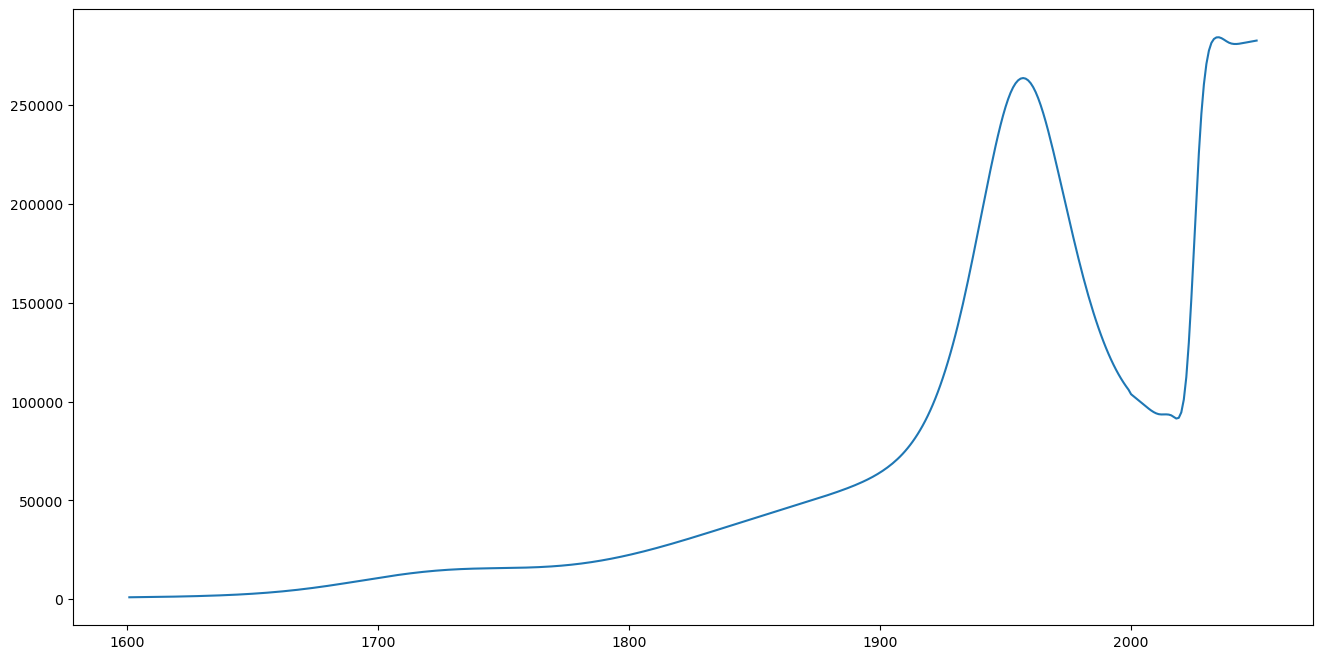

In [60]:
plt.figure(figsize=(16,8))

DSM_model_s2=DSM_model.copy(deep=True)
target_UK=300000
ratioUK_En=0.94
target_En=target_UK * ratioUK_En
for i in range (2022,2031):
    DSM_model_s2.loc[i,'Stock Change']=DSM_model_s2.loc[i-1,'Stock Change']+(target_En - DSM_model_s2.loc[2021,'Stock Change']) / (2030-2021)
for i in range (2031,2051):
    DSM_model_s2.loc[i,'Stock Change']=target_En

inputs=np.array(DSM_model_s2.index[-51:])
outputs=DSM_model_s2.loc[2000:2051,'Stock Change']

no_knots = int(len(inputs)/6)
ncs_model = ncs.get_natural_cubic_spline_model(inputs, outputs, minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
O_model = ncs_model.predict(inputs)
fit_label = f'natural cubic splines with {no_knots} knots'  

DSM_model_s2.loc[2000:2051,'Stock Change']=O_model
    
plt.plot(DSM_model_s2['Stock Change'])


In [61]:
share_AB=DSM_AB_model.loc[2021,'Stock']/DSM_model.loc[2021,'Stock']
share_MFH=DSM_MFH_model.loc[2021,'Stock']/DSM_model.loc[2021,'Stock']
share_SFH=DSM_SFH_model.loc[2021,'Stock']/DSM_model.loc[2021,'Stock']
share_TH=DSM_TH_model.loc[2021,'Stock']/DSM_model.loc[2021,'Stock']

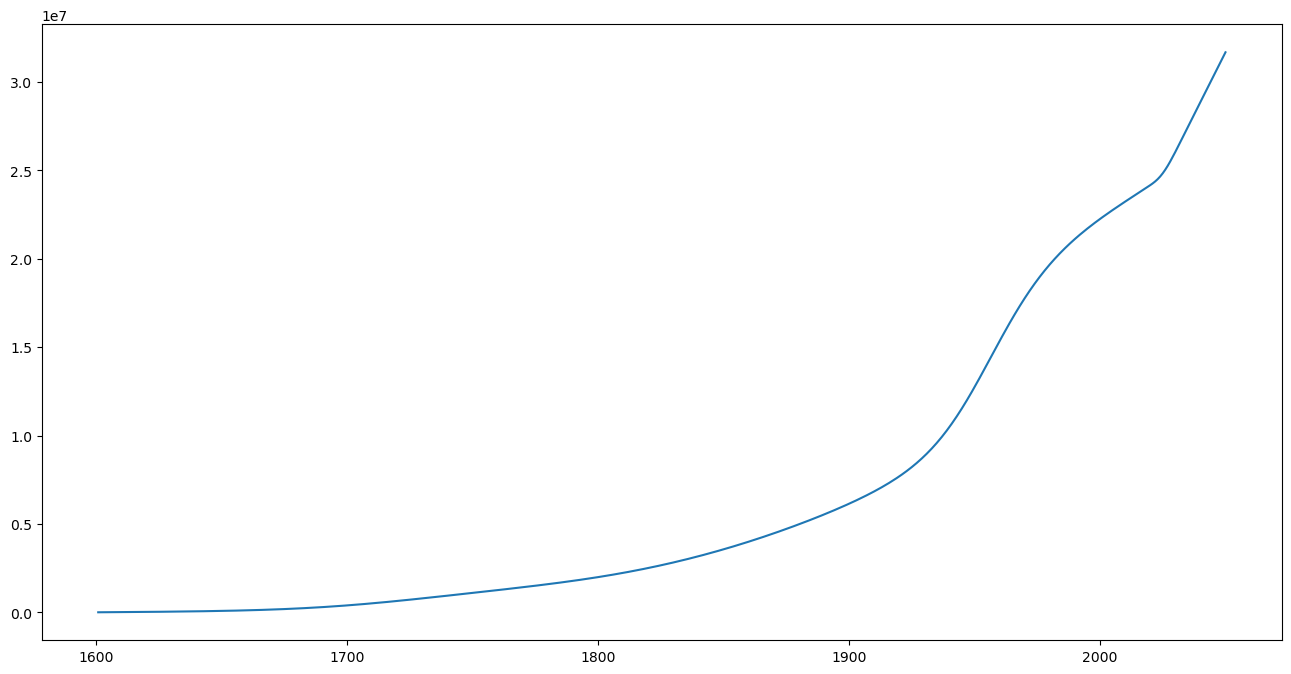

In [63]:
plt.figure(figsize=(16,8))

for i in range (2021,2051):
    DSM_model_s2.loc[i,'Stock'] = DSM_model_s2.loc[i-1,'Stock'] + DSM_model_s2.loc[i,'Stock Change']


plt.plot(DSM_model_s2['Stock'])

In [65]:
DSM_AB_s2 = DSM_AB_model.copy(deep=True)
DSM_MFH_s2 = DSM_MFH_model.copy(deep=True)
DSM_SFH_s2 = DSM_SFH_model.copy(deep=True)
DSM_TH_s2 = DSM_TH_model.copy(deep=True)

In [66]:
DSM_AB_s2.loc[2000:2051,'Stock Change'] = share_AB * DSM_model_s2.loc[2000:2051,'Stock Change']
DSM_MFH_s2.loc[2000:2051,'Stock Change'] = share_MFH * DSM_model_s2.loc[2000:2051,'Stock Change']
DSM_SFH_s2.loc[2000:2051,'Stock Change'] = share_SFH * DSM_model_s2.loc[2000:2051,'Stock Change']
DSM_TH_s2.loc[2000:2051,'Stock Change'] = share_TH * DSM_model_s2.loc[2000:2051,'Stock Change']

In [67]:
for i in range (2021,2051):
    DSM_AB_s2.loc[i,'Stock'] = DSM_AB_s2.loc[i-1,'Stock'] + DSM_AB_s2.loc[i,'Stock Change']
    
for i in range (2021,2051):
    DSM_MFH_s2.loc[i,'Stock'] = DSM_MFH_s2.loc[i-1,'Stock'] + DSM_MFH_s2.loc[i,'Stock Change']

for i in range (2021,2051):
    DSM_SFH_s2.loc[i,'Stock'] = DSM_SFH_s2.loc[i-1,'Stock'] + DSM_SFH_s2.loc[i,'Stock Change']
    
for i in range (2021,2051):
    DSM_TH_s2.loc[i,'Stock'] = DSM_TH_s2.loc[i-1,'Stock'] + DSM_TH_s2.loc[i,'Stock Change']

<Figure size 1600x800 with 0 Axes>

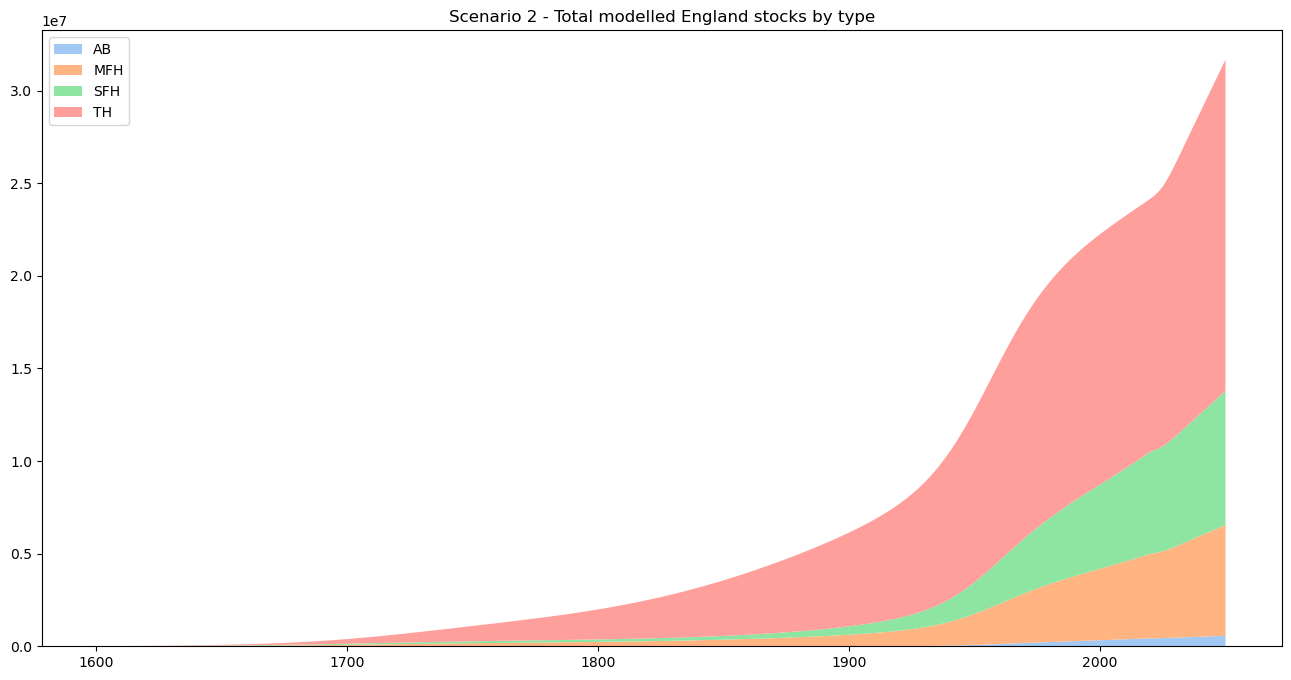

In [74]:
plt.figure(figsize=(16,8))
TYP = ['AB','MFH','SFH','TH']
stocks_by_types = [DSM_AB_s2['Stock'].to_list(),DSM_MFH_s2['Stock'].to_list(),DSM_SFH_s2['Stock'].to_list(),DSM_TH_s2['Stock'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM_model_s2.index,stocks_by_types, labels=TYP, colors=colors)
plt.legend(loc='upper left')
plt.title('Scenario 2 - Total modelled England stocks by type')
#plt.savefig("Output/Inflows-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()